### Backtracking and Convolutional Neural Nets

<center>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg/1200px-Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg.png" width = 50%
         />
    </center>

In [1]:
grid = [[5, 3, 0, 0, 7, 0, 0, 0, 0], 
       [6, 0, 0, 1, 9, 5, 0, 0, 0],
       [0, 9, 8, 0, 0, 0, 0, 6, 0],
       [8, 0, 0, 0, 6, 0, 0, 0, 3],
       [4, 0, 0, 8, 0, 3, 0, 0, 1],
       [7, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 6, 0, 0, 0, 0, 2, 8, 0],
       [0, 0, 0, 4, 1, 9, 0, 0, 5],
       [0, 0, 0, 0, 8, 0, 0, 7, 9]]

In [2]:
grid = [[0, 5, 6, 4, 7, 3, 2, 0, 0],
       [0, 2, 9, 0, 0, 0, 7, 8, 0],
       [0, 0, 0, 0, 0, 2, 0, 3, 6],
       [7, 9, 0, 0, 2, 0, 0, 0 ,0],
       [1, 0, 5, 0, 0, 0, 8, 6, 2],
       [6, 0, 0, 8, 3, 0, 0, 7, 1],
       [0, 0, 0, 3, 0, 0, 4, 2, 8], 
       [5, 7, 4, 0, 0, 0, 6, 0, 0],
       [0, 0, 3, 6, 9, 4, 0, 0, 0]]

In [3]:
def print_grid():
    for line in grid:
        for square in line:
            if square == 0:
                print(".", end = " ")
            else:
                print(square, end=" ")
        print()

In [4]:
print_grid()

. 5 6 4 7 3 2 . . 
. 2 9 . . . 7 8 . 
. . . . . 2 . 3 6 
7 9 . . 2 . . . . 
1 . 5 . . . 8 6 2 
6 . . 8 3 . . 7 1 
. . . 3 . . 4 2 8 
5 7 4 . . . 6 . . 
. . 3 6 9 4 . . . 


In [6]:
import sys

In [7]:
for i in range(10):
    print("Loading" + "." * i)
    sys.stdout.write("\033[F")

Loading
Loading.
Loading..
Loading...
Loading....
Loading.....
Loading......
Loading.......
Loading........
Loading.........


In [47]:
def possible(y, x, n):
    for i in range(0, 9):
        if grid[y][i] == n:
            return False
    for i in range(9):
        if grid[i][x] == n:
            return False
    x0 = (x//3)*3
    y0 = (y//3)*3
    for i in range(3):
        for j in range(3):
            if grid[y0 + i][x0 + j] == n:
                return False
    return True
    
            

In [50]:
def solve():
    for y in range(0, 9):
        for x in range(0,9):
            if grid[y][x] == 0:
                for n in range(1, 10):
                    if possible(y, x, n):
                        grid[y][x] = n
                        solve()
                        grid[y][x] = 0
                return 
    print_grid()

### Convolutional Neural Net

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import cifar10, fashion_mnist

In [82]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [83]:
x_train.shape

(50000, 32, 32, 3)

In [84]:
names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [85]:
d = {k:v for k,v in zip(range(10), names)}

Text(0.5, 1.0, 'horse')

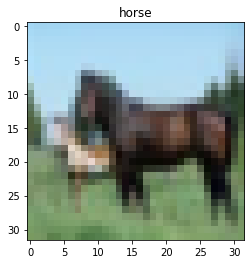

In [86]:
plt.imshow(x_train[12])
plt.title(d[y_train[12][0]])

In [87]:
x_train = x_train/255
x_test = x_test/255

In [88]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [89]:
model = Sequential()

In [90]:
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

In [91]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [92]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [93]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [97]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 32,  validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 48s 952us/step - loss: 1.1124 - accuracy: 0.6065 - val_loss: 1.0705 - val_accuracy: 0.6215
Epoch 2/5
50000/50000 [==============================] - 48s 965us/step - loss: 0.9571 - accuracy: 0.6643 - val_loss: 0.9629 - val_accuracy: 0.6618
Epoch 3/5
50000/50000 [==============================] - 48s 969us/step - loss: 0.8507 - accuracy: 0.6995 - val_loss: 0.9135 - val_accuracy: 0.6859
Epoch 4/5
50000/50000 [==============================] - 48s 962us/step - loss: 0.7734 - accuracy: 0.7290 - val_loss: 0.8866 - val_accuracy: 0.6932
Epoch 5/5
50000/50000 [==============================] - 48s 956us/step - loss: 0.7072 - accuracy: 0.7488 - val_loss: 0.8391 - val_accuracy: 0.7138


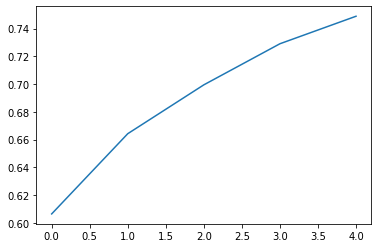

In [98]:
plt.plot(history.history['accuracy'])